In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
df = pd.read_csv("used_car_data.csv")

In [ ]:
df["Year"].empty

False

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
df.shape

(6019, 12)

In [ ]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [ ]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [ ]:
# Tugas 1 : Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek
#sub Tugas 1 : banyak mobil untuk tiap merek
df.groupby("Name")["Year"].count()

Name
Ambassador Classic Nova Diesel    1
Audi A3 35 TDI Attraction         1
Audi A3 35 TDI Premium            1
Audi A3 35 TDI Premium Plus       1
Audi A3 35 TDI Technology         1
                                 ..
Volvo XC60 D4 Summum              1
Volvo XC60 D5                     3
Volvo XC60 D5 Inscription         1
Volvo XC90 2007-2015 D5 AT AWD    1
Volvo XC90 2007-2015 D5 AWD       1
Name: Year, Length: 1876, dtype: int64

In [ ]:
#sub tugas 1 : merek mobil apa saja yang tersedia
df["Name"]

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 6019, dtype: object

In [ ]:
# Tugas 2 : Kota apa yang memiliki mobil bekas paling banyak?
df1 = df.groupby("Location")["Name"].count()
df1.idxmax()

'Mumbai'

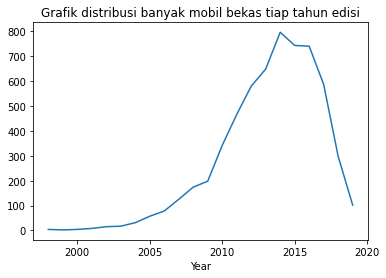

In [ ]:
# Tugas 3 : Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?

# Distribusi mobil bekas dari tahun ke tahun
df2=df.groupby("Year")["Name"].count()
df2.plot(kind="line",x="Year",y="Jumlah mobil bekas", title="Grafik distribusi banyak mobil bekas tiap tahun edisi")
#Dari grafik dibawah terlihat bahwa jumlah mobil bekas edisi tahun 2000 hingga tahun 2014 mengalami kenaikan. Namun 

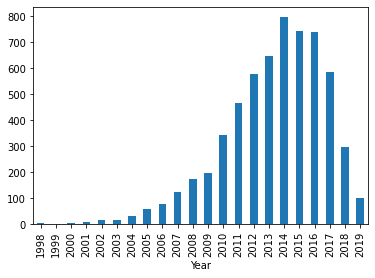

In [ ]:
df2.plot(kind="bar")

In [ ]:
df2=df.groupby("Year")["Name"].count()
df2

Year
1998      4
1999      2
2000      4
2001      8
2002     15
2003     17
2004     31
2005     57
2006     78
2007    125
2008    174
2009    198
2010    342
2011    466
2012    580
2013    649
2014    797
2015    744
2016    741
2017    587
2018    298
2019    102
Name: Name, dtype: int64

In [ ]:
# Tugas 4 : Berapa banyak mobil yang memiliki total jarak pemakaian dibawah 100.000 km?

df.loc[df["Kilometers_Driven"]<100000]["Name"].count()

5470

In [ ]:
# Tugas 5 : Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi?
# Sertakan argumen mendukung!
# Mencari quartile dari dataframe "Kilometers_Driven"
sorted(df["Kilometers_Driven"])
q1, q2= np.percentile(df["Kilometers_Driven"],[100/3,200/3])
print(q1, q2)

40318.0 65278.0


In [ ]:
# Rendah atau tinggi jarak pemakaian juga bisa dilihat dengan menghitung rata-rata keseluruhan jarak pemakaian mobil bekas

df["Kilometers_Driven"].mean()

# Diperoleh rata-rata pemakaian 58738.38029573019 km. Angka pemakaian di atas rata-rata dapat digolongkan tinggi, dan dibawah rata-rata dapat digolongkan rendah

58738.38029573019

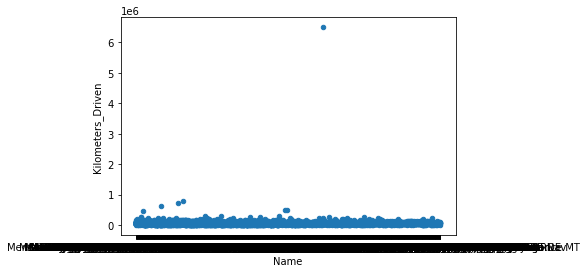

In [ ]:
#Tugas 6 : Apakah terdapat outlier pada "Kilometers_Driven"
#Mencari outlier pada suatu data dapat menggunakan 3 metode :
#Metode pertama : Menggunakan scatter plot
df.plot(kind="scatter", x="Name", y="Kilometers_Driven")

In [ ]:
df["Kilometers_Driven"].max()

6500000

In [ ]:
df["Kilometers_Driven"].mean()

58738.38029573019

In [ ]:
#Tugas 7 : Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian?
dff=df.groupby("Year")["Kilometers_Driven"].mean().to_frame().reset_index()
dff["Year"].corr(dff["Kilometers_Driven"])

-0.8766589952046588

In [ ]:
df.groupby("Year")["Kilometers_Driven"].mean().to_frame().reset_index()

,Year,Kilometers_Driven
0,1998,87400.000000
1,1999,105000.000000
2,2000,112500.000000
3,2001,139742.875000
4,2002,75354.066667
5,2003,81862.411765
6,2004,103154.290323
7,2005,92942.245614
8,2006,97208.102564
9,2007,84852.496000


In [ ]:
df["Year"].corr(df["Kilometers_Driven"])

-0.17304756550241177

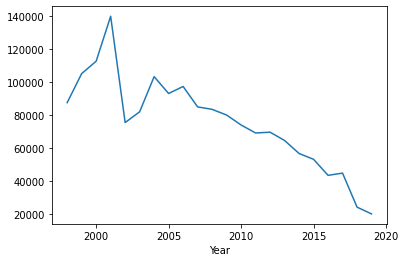

In [ ]:
# Grafik Rata-rata total jarak pemakaian mobil tiap tahun edisi 
df1=df.groupby("Year")["Kilometers_Driven"].mean()
df1.plot(kind="line")

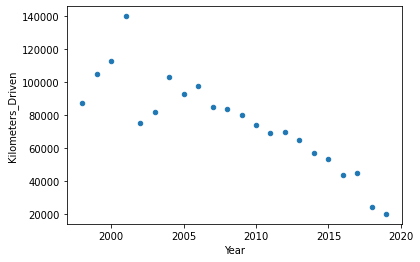

In [ ]:
df.groupby("Year")["Kilometers_Driven"].mean().to_frame().reset_index().plot(kind="scatter",x="Year",y="Kilometers_Driven")

In [ ]:
# Tugas 8 : Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?
df.loc[(df["Owner_Type"]=="Third") | (df["Owner_Type"] == "Fourth & Above")]["Name"].count()

122

In [ ]:
# Tugas 9 : Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?

# Fungsi untuk menghapus string yang tidak diinginkan (pada kasus ini satuan kmpl dan km/kg)
def clean(x):
    if isinstance(x,str):
        return(x.replace('kmpl','').replace('km/kg',''))
    return(x)
#Aplikasi fungsi pada column dataframe "Mileage" dan mengubah tipe data ke float
df['Mileage']=df['Mileage'].apply(clean).astype('float')

#Menghapus data kotor
df_bersih = df.loc[df["Mileage"]!=0.00].dropna()

# Melihat rata-rata konsumsi bahan bakar tiap tipe bahan bakar
df_fueltype = df_bersih.groupby("Fuel_Type")["Mileage"].mean()

# Mendapat tipe kendaraan dengan rata-rata minimum konsumsi bahan bakar
df_fueltype.idxmin()

'Petrol'

In [ ]:
# Alternatif 2 Nomor 9 : Jika Melihat secara keseluruhan langsung tipe bahan bakar apa yang mengonsumsi minimum bahan bakar
df_sorted=df_bersih.sort_values(["Mileage"],ascending=[1])
df_sorted["Fuel_Type"][0:1]

5781    Petrol
Name: Fuel_Type, dtype: object

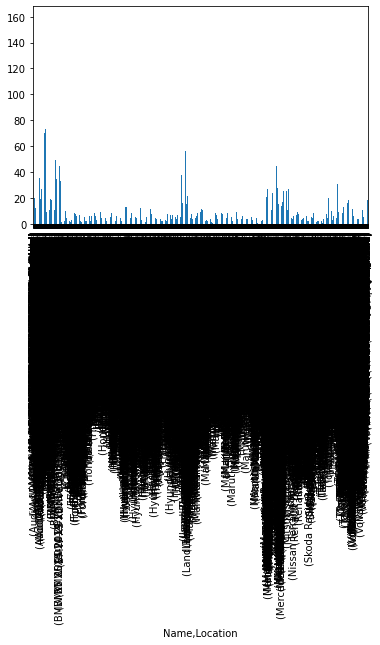

In [ ]:
# Tugas 10 : Apa saja yang mempengaruhi harga mobil bekas di India
df.groupby(["Name","Location"])["Price"].mean().plot(kind="bar")

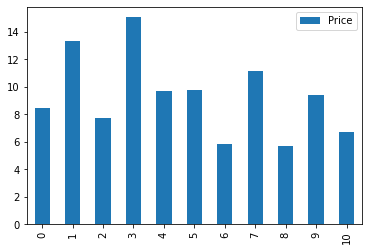

In [ ]:
dfa = df.groupby(["Location"])["Price"].mean().to_frame().reset_index().plot(kind="bar")

In [ ]:
df.groupby(["Name","Location"])["Price"].mean()

In [ ]:
df["Price"].corr(df["Mileage"])

-0.3065928136268645

In [ ]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [ ]:
# Mencari korelasi 'Price' dengan berbagai atribut lain

# Fungsi untuk menghapus string yang tidak diinginkan (pada kasus ini satuan pada beberapa kolom)
def clean(x):
    if isinstance(x,str):
        return(x.replace('kmpl','').replace('km/kg','').replace('CC','').replace('bhp',''))
    return(x)

In [ ]:
#Menghapus data kosong
df_cl = df.loc[(df['Power']!='null bhp')&(df['Mileage']!='0.0 kmpl')].dropna(how='any')

#Aplikasi fungsi 'clean' pada df_cl dan mengubah type data beberapa kolom menjadi float
df_cl['Mileage']=df_cl['Mileage'].apply(clean).astype('float')
df_cl['Engine']=df_cl['Engine'].apply(clean).astype('float')
df_cl['Power']=df_cl['Power'].apply(clean).astype('float')

In [ ]:
df_cl["Price"].corr(df_cl["Mileage"])

-0.3369248775825047

In [ ]:
df_cl["Engine"].corr(df_cl["Power"])

0.8668036974480509

In [ ]:
df_cl["Price"].corr(df_cl["Power"])

0.7749460816536328

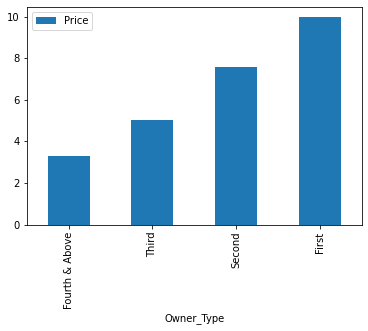

In [ ]:
df.groupby(["Owner_Type"])["Price"].mean().to_frame().reset_index().sort_values(["Price"], ascending=True).plot(kind="bar", x="Owner_Type", y="Price")

In [ ]:
df.loc[df["Seats"]!=0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,18.0


In [ ]:
dff=df_cl.groupby("Year")["Price"].mean().to_frame().reset_index()
dff["Year"].corr(dff["Price"])

0.9405632347999119

In [ ]:
#Korelasi price dengan seats

#Mengabaikan data kosong pada seats
dfs=df.loc[df["Seats"]!=0.0]

dfss=dfs.groupby(["Seats"])["Price"].mean().to_frame().reset_index()
dfss["Seats"].corr(dfss["Price"])

-0.8146631646370741

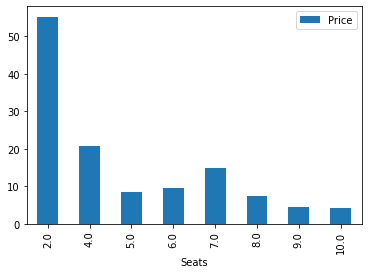

In [ ]:
# Grafik Korelasi price dengan seats
dfss.plot(kind="bar",x="Seats",y="Price")

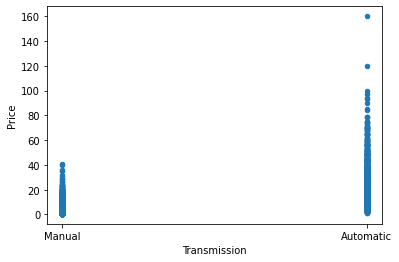

In [ ]:
df.plot(kind="scatter",x="Transmission",y="Price")

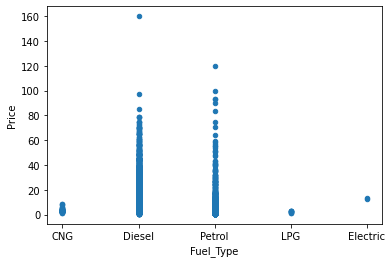

In [ ]:
df.plot(kind="scatter",x="Fuel_Type",y="Price")

In [ ]:
# ANALISIS TAMBAHAN

# Apakah ada korelasi antara transmission dengan mileage (konsumsi bahan bakar),
# Engine, dan Power dari mobil bekas?

In [ ]:
df_cl.groupby("Transmission")["Power"].mean()

Transmission
Automatic    167.633349
Manual        91.135294
Name: Power, dtype: float64

MELIHAT DISTRIBUSI PENGGUNAAN MOBIL BEKAS DENGAN TRANSMISI MANUAL DAN OTOMATIS TIAP TAHUN EDISI

In [ ]:
df_trans=df.groupby(["Transmission","Year"])["Name"].count().to_frame().reset_index()
df_trans.loc[df_trans["Transmission"]=="Automatic"]

,Transmission,Year,Name
0,Automatic,1998,1
1,Automatic,2003,2
2,Automatic,2004,6
3,Automatic,2005,9
4,Automatic,2006,11
5,Automatic,2007,20
6,Automatic,2008,42
7,Automatic,2009,67
8,Automatic,2010,77
9,Automatic,2011,132


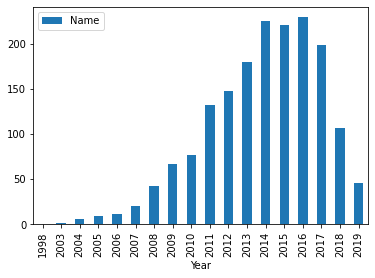

In [ ]:
df_trans.loc[df_trans["Transmission"]=="Automatic"].plot(kind="bar",x="Year",y="Name")

In [ ]:
df_trans.loc[df_trans["Transmission"]=="Manual"]

,Transmission,Year,Name
18,Manual,1998,3
19,Manual,1999,2
20,Manual,2000,4
21,Manual,2001,8
22,Manual,2002,15
23,Manual,2003,15
24,Manual,2004,25
25,Manual,2005,48
26,Manual,2006,67
27,Manual,2007,105
